查看数据

In [153]:
import pyreadstat

sav_file = "D:\学习资料\数据挖掘\实验报告\某车企汽车销量预售\数据-汽车销量预测.sav"

data, meta = pyreadstat.read_sav(sav_file, apply_value_formats=True)

print(data)


      year  sales
0   1988.0   65.0
1   1989.0   59.0
2   1990.0   51.0
3   1991.0   71.0
4   1992.0  106.0
5   1993.0  130.0
6   1994.0  135.0
7   1995.0  145.0
8   1996.0  146.0
9   1997.0  157.0
10  1998.0  160.0
11  1999.0  183.0
12  2000.0  208.0
13  2001.0  236.0


观察数据分布

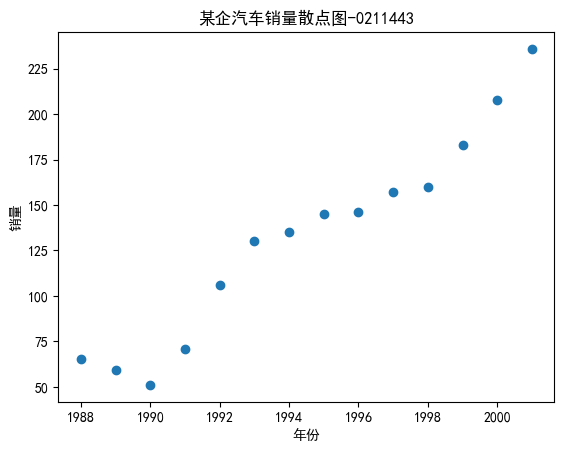

In [154]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'

x = data['year']
y = data['sales']

plt.scatter(x, y, label='销售数据')

plt.title('某企汽车销量散点图-0211443')
plt.xlabel('年份')
plt.ylabel('销量')

plt.show()

删除1989-1990年的销量数据，重新绘制散点图

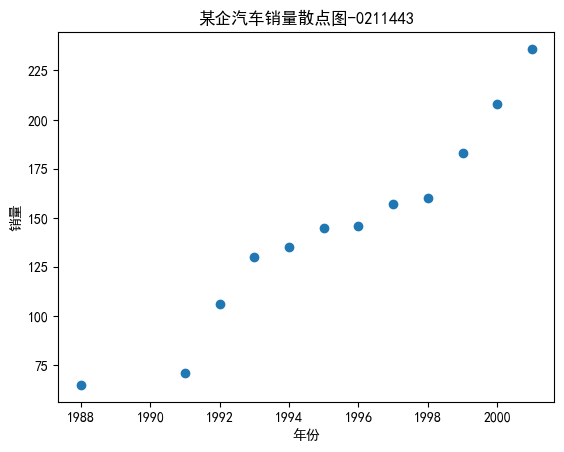

In [155]:
condition = (data['year'] > 1990) | (data['year'] < 1989)

# 过滤数据
filtered_data = data[condition]

x = filtered_data['year']
y = filtered_data['sales']

plt.scatter(x, y, label='销量数据')

plt.title('某企汽车销量散点图-0211443')
plt.xlabel('年份')
plt.ylabel('销量')

plt.show()


建立线性回归模型

系数 (a)：12.66860465116279
截距 (b)：-25133.162790697672


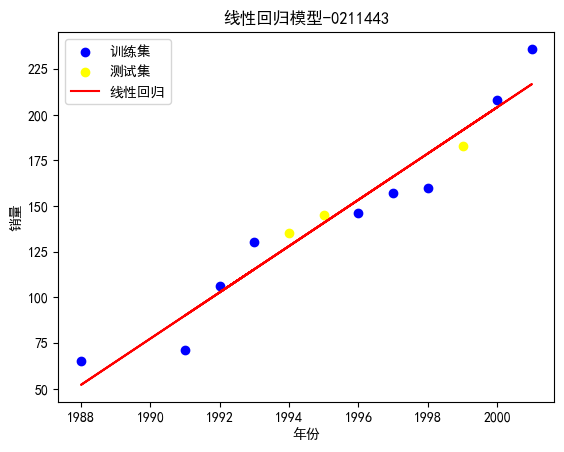

In [157]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.sans-serif'] = 'SimHei'

x_stu0211443 = filtered_data[['year']]
y_stu0211443 = filtered_data['sales']

# 将数据分为训练集和测试集
x_train_stu0211443, x_test_stu0211443, y_train_stu0211443, y_test_stu0211443 = train_test_split(x_stu0211443, y_stu0211443, test_size=0.2, random_state=2)

# 创建线性回归模型并拟合训练数据
model = LinearRegression()
model.fit(x_train_stu0211443, y_train_stu0211443)

a = model.coef_
b = model.intercept_

print(f"系数 (a)：{a[0]}")
print(f"截距 (b)：{b}")

# 使用模型进行预测
y_pred = model.predict(x_test_stu0211443)
y_train_pred = model.predict(x_train_stu0211443)

# 绘制原始数据点和回归线
plt.scatter(x_train_stu0211443, y_train_stu0211443, color='blue', label='训练集')
plt.scatter(x_test_stu0211443, y_test_stu0211443, color='yellow', label='测试集')

plt.plot(x_train_stu0211443, y_train_pred, color='red', label='线性回归')

plt.title('线性回归模型-0211443')
plt.xlabel('年份')
plt.ylabel('销量')
plt.legend()

plt.show()

In [ ]:
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.sans-serif'] = 'SimHei'
# 计算残差
residuals = y_stu0211443 - model.predict(x_stu0211443)

plt.plot(x_stu0211443, residuals, color='purple', marker='o', linestyle='-', label='连续残差')
plt.axhline(y=0, color='gray', linestyle='--', label='残差=0')

plt.title('线性拟合残差序列图-0211443')
plt.xlabel('年份')
plt.ylabel('残差')
plt.legend()
plt.show()

线性回归模型拟合指标

In [158]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# R-squared  根据测试集计算
r_squared = model.score(x_train_stu0211443, y_train_stu0211443)
print(f'R方 (R-squared)：{r_squared:.6f}')

# 平均绝对误差
mae = mean_absolute_error(y_train_stu0211443, y_train_pred)
print(f'平均绝对误差 (MAE)：{mae:.6f}')

# 均方误差
mse = mean_squared_error(y_train_stu0211443, y_train_pred)
print(f'均方误差 (MSE)：{mse:.6f}')

# 均方根误差
rmse = np.sqrt(mse)
print(f'均方根误差 (RMSE)：{rmse:.6f}')

R方 (R-squared)：0.937738
平均绝对误差 (MAE)：12.033592
均方误差 (MSE)：181.023256
均方根误差 (RMSE)：13.454488


二次拟合

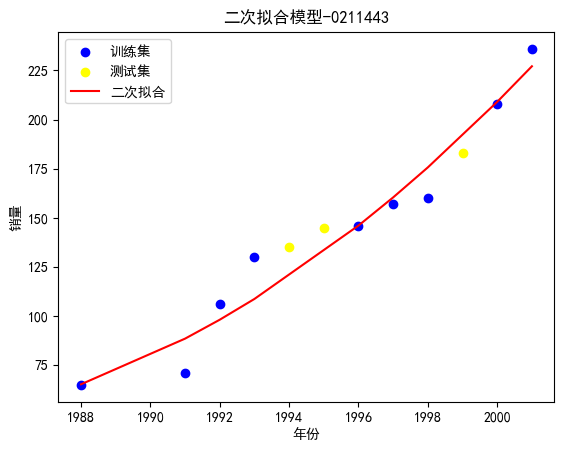

In [159]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np

x = filtered_data[['year']]
y = filtered_data['sales']

# 创建 PolynomialFeatures 对象，将特征转换为二次多项式
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

# 将数据分为训练集和测试集
x_train_stu0211443, x_test_stu0211443, y_train_stu0211443, y_test_stu0211443 = train_test_split(x_poly, y, test_size=0.2, random_state=2)

# 创建线性回归模型并拟合训练数据
model = LinearRegression()
model.fit(x_train_stu0211443, y_train_stu0211443)

# 预测
y_pred = model.predict(x_test_stu0211443)
y_train_pred = model.predict(x_train_stu0211443)


# 绘制训练集和测试集的数据点
plt.scatter(x_train_stu0211443[:, 1], y_train_stu0211443, color='blue', label='训练集')
plt.scatter(x_test_stu0211443[:, 1], y_test_stu0211443, color='yellow', label='测试集')

# 绘制拟合曲线
# 获取排序后的索引
sorted_indices = np.argsort(x_train_stu0211443[:, 1])

x_train_sorted = x_train_stu0211443[sorted_indices]
y_train_sorted = y_train_pred[sorted_indices]

plt.plot(x_train_sorted[:, 1], y_train_sorted, color='red', label='二次拟合')

plt.title('二次拟合模型-0211443')
plt.xlabel('年份')
plt.ylabel('销量')
plt.legend()

plt.show()


D:\pythonProject\Project1\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


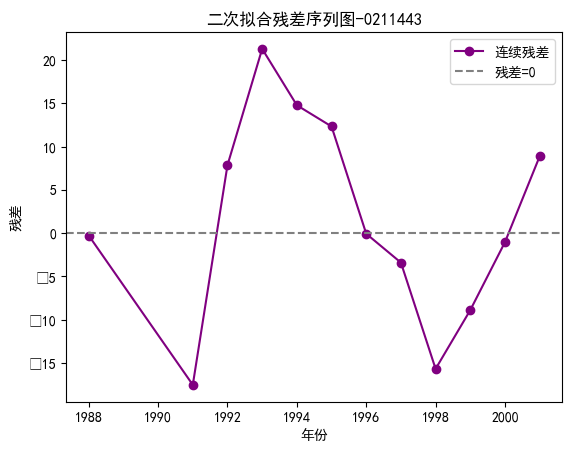

In [160]:
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.sans-serif'] = 'SimHei'
# 计算残差
residuals = y - model.predict(x_poly)

plt.plot(x, residuals, color='purple', marker='o', linestyle='-', label='连续残差')
plt.axhline(y=0, color='gray', linestyle='--', label='残差=0')

plt.title('二次拟合残差序列图-0211443')
plt.xlabel('年份')
plt.ylabel('残差')
plt.legend()
plt.show()

二次拟合模型指标

In [161]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# 计算R方（R-squared）
r_squared = model.score(x_train_stu0211443, y_train_stu0211443)
print(f'R方 (R-squared)：{r_squared:.6f}')

# 计算平均绝对误差（MAE）
mae_value = mean_absolute_error(y_train_stu0211443, y_train_pred)
print(f'平均绝对误差 (MAE)：{mae_value:.6f}')

# 计算均方误差（MSE）
mse_value = mean_squared_error(y_train_stu0211443, y_train_pred)
print(f'均方误差 (MSE)：{mse_value:.6f}')

# 计算均方根误差（RMSE）
rmse_value = sqrt(mean_squared_error(y_train_stu0211443, y_train_pred))
print(f'均方根误差 (RMSE)：{rmse_value:.6f}')


R方 (R-squared)：0.955726
平均绝对误差 (MAE)：8.442974
均方误差 (MSE)：128.723639
均方根误差 (RMSE)：11.345644


三次拟合模型

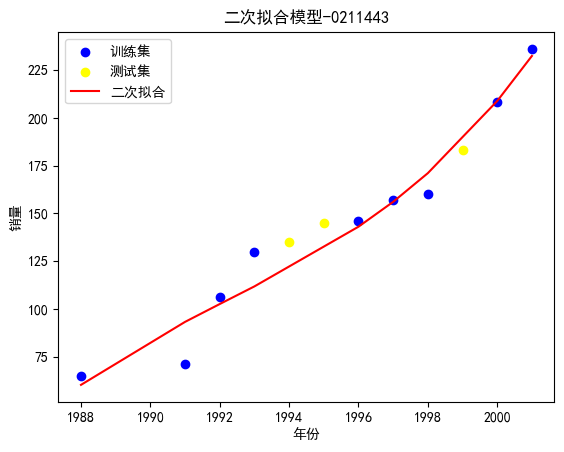

In [162]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np

x = filtered_data[['year']]
y = filtered_data['sales']

# 创建 PolynomialFeatures 对象，将特征转换为二次多项式
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

# 将数据分为训练集和测试集
x_train_stu0211443, x_test_stu0211443, y_train_stu0211443, y_test_stu0211443 = train_test_split(x_poly, y, test_size=0.2, random_state=2)

# 创建线性回归模型并拟合训练数据
model = LinearRegression()
model.fit(x_train_stu0211443, y_train_stu0211443)

# 预测
y_pred = model.predict(x_test_stu0211443)
y_train_pred = model.predict(x_train_stu0211443)


# 绘制训练集和测试集的数据点
plt.scatter(x_train_stu0211443[:, 1], y_train_stu0211443, color='blue', label='训练集')
plt.scatter(x_test_stu0211443[:, 1], y_test_stu0211443, color='yellow', label='测试集')

# 绘制拟合曲线
# 获取排序后的索引
sorted_indices = np.argsort(x_train_stu0211443[:, 1])

x_train_sorted = x_train_stu0211443[sorted_indices]
y_train_sorted = y_train_pred[sorted_indices]

plt.plot(x_train_sorted[:, 1], y_train_sorted, color='red', label='二次拟合')

plt.title('三次拟合模型-0211443')
plt.xlabel('年份')
plt.ylabel('销量')
plt.legend()

plt.show()


In [ ]:
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.sans-serif'] = 'SimHei'
# 计算残差
residuals = y - model.predict(x_poly)

plt.plot(x, residuals, color='purple', marker='o', linestyle='-', label='连续残差')
plt.axhline(y=0, color='gray', linestyle='--', label='残差=0')

plt.title('三次拟合残差序列图-0211443')
plt.xlabel('年份')
plt.ylabel('残差')
plt.legend()
plt.show()

In [ ]:
future_years = np.array([2002, 2003, 2004, 2005]).reshape(-1, 1)

future_years_poly = poly.transform(future_years)

future_sales = model.predict(future_years_poly)
    
for year, sales in zip(future_years.flatten(), future_sales):
    print(f"预测{year}年的销量为: {sales:.2f}")


三次拟合模型指标

In [163]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# 计算R方（R-squared）
r_squared = model.score(x_train_stu0211443, y_train_stu0211443)
print(f'R方 (R-squared)：{r_squared:.6f}')

# 计算平均绝对误差（MAE）
mae_value = mean_absolute_error(y_train_stu0211443, y_train_pred)
print(f'平均绝对误差 (MAE)：{mae_value:.6f}')

# 计算均方误差（MSE）
mse_value = mean_squared_error(y_train_stu0211443, y_train_pred)
print(f'均方误差 (MSE)：{mse_value:.6f}')

# 计算均方根误差（RMSE）
rmse_value = sqrt(mean_squared_error(y_train, y_train_pred))
print(f'均方根误差 (RMSE)：{rmse_value:.6f}')


R方 (R-squared)：0.961583
平均绝对误差 (MAE)：7.553692
均方误差 (MSE)：111.694959
均方根误差 (RMSE)：10.568584


指数模型

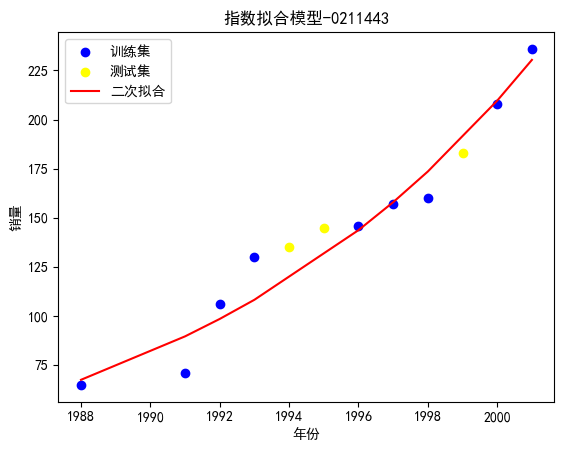

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x_data = filtered_data['year']
y_data = filtered_data['sales']

# 将数据分为训练集和测试集
x_train_stu0211443, x_test_stu0211443, y_train_stu0211443, y_test_stu0211443 = train_test_split(x_data, y_data, test_size=0.2, random_state=2)

# 定义指数函数模型
# a-控制指数函数的振幅，b-控制指数函数的增长速度
def ex_func(x, a, b):
    return a * np.exp(b * (x - x_data.min()))  # 将 x 调整为从最小值开始

# 使用 curve_fit 进行拟合
# 返回拟合后的参数 params 和参数的协方差矩阵 covariance
params, covariance = curve_fit(ex_func, x_train_stu0211443, y_train_stu0211443)

# 获取拟合后的参数
a, b = params

# 使用拟合后的参数生成预测值
y_pred = ex_func(x_test_stu0211443, a, b)
y_train_pred = ex_func(x_train_stu0211443, a, b)

# 绘制训练集和测试集的数据点
plt.scatter(x_train_stu0211443, y_train_stu0211443, color='blue', label='训练集')
plt.scatter(x_test_stu0211443, y_test_stu0211443, color='yellow', label='测试集')

# 绘制拟合曲线
sorted_indices = np.argsort(x_train_stu0211443)

x_train_sorted = x_train_stu0211443.iloc[sorted_indices]
y_train_pred_sorted = y_train_pred.iloc[sorted_indices]

plt.plot(x_train_sorted, y_train_pred_sorted, color='red', label='二次拟合')

plt.title('指数拟合模型-0211443')
plt.xlabel('年份')
plt.ylabel('销量')
plt.legend()

plt.show()


D:\pythonProject\Project1\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


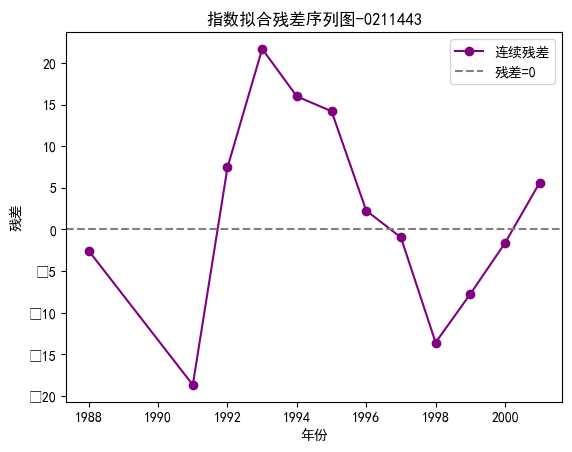

In [165]:
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.sans-serif'] = 'SimHei'
# 计算残差
residuals = y_data - ex_func(x_data, a, b)

# 连接残差点
plt.plot(x_data, residuals, color='purple', marker='o', linestyle='-', label='连续残差')
plt.axhline(y=0, color='gray', linestyle='--', label='残差=0')

plt.title('指数拟合残差序列图-0211443')
plt.xlabel('年份')
plt.ylabel('残差')
plt.legend()
plt.show()

指数模型指标

In [166]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

# 计算R方（R-squared）
r_squared = r2_score(y_train_stu0211443, y_train_pred)
print(f'R方 (R-squared)：{r_squared:.6f}')

# 计算平均绝对误差（MAE）
mae_value = mean_absolute_error(y_train_stu0211443, y_train_pred)
print(f'平均绝对误差 (MAE)：{mae_value:.6f}')

# 计算均方误差（MSE）
mse_value = mean_squared_error(y_train_stu0211443, y_train_pred)
print(f'均方误差 (MSE)：{mse_value:.6f}')

# 计算均方根误差（RMSE）
rmse_value = sqrt(mse_value)
print(f'均方根误差 (RMSE)：{rmse_value:.6f}')


R方 (R-squared)：0.957707
平均绝对误差 (MAE)：8.273561
均方误差 (MSE)：122.962889
均方根误差 (RMSE)：11.088863


分段拟合

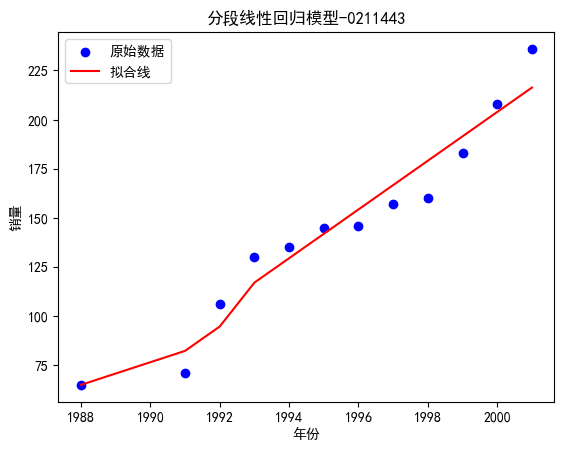

In [167]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 原始数据
x_data = np.array(filtered_data['year'])
y_data = np.array(filtered_data['sales'])

# 定义分段函数模型
def segmented_func(x, a, b, c, d, e):
    return np.piecewise(x, [x < 1991, (1991 <= x) & (x < 1993), (1993 <= x) & (x < 1997), x >= 1997], [lambda x: a + b * x, lambda x: c + d * x, lambda x: e + d * x, lambda x: e + d * x])

# 拟合数据
popt, _ = curve_fit(segmented_func, x_data, y_data)

# 生成拟合结果
y_pred = segmented_func(x_data, *popt)

# 绘制原始数据点和拟合线
plt.scatter(x_data, y_data, color='blue', label='原始数据')
plt.plot(x_data, y_pred, color='red', label='拟合线')

plt.xlabel('年份')
plt.ylabel('销量')
plt.legend()
plt.title('分段线性回归模型-0211443')

plt.show()


In [168]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 计算R方 (R-squared)
ssr = np.sum((y_pred - np.mean(y_data))**2)
sst = np.sum((y_data - np.mean(y_data))**2)
r_squared = ssr / sst
print(f"R方 (R-squared): {r_squared}")

# 计算均方误差 (MSE)
mse = mean_squared_error(y_data, y_pred)
print(f"平均绝对误差 (MAE): {mae}")

# 计算平均绝对误差 (MAE)
mae = mean_absolute_error(y_data, y_pred)
print(f"均方误差 (MSE): {mse}")

# 计算均方根误差 (RMSE)
rmse = np.sqrt(mse)
print(f"均方根误差 (RMSE): {rmse}")


R方 (R-squared): 0.9472181635990409
平均绝对误差 (MAE): 12.033591731265915
均方误差 (MSE): 122.21487603305786
均方根误差 (RMSE): 11.055083718952917
